In [39]:
from selenium import webdriver
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.edge.options import Options
import os
from selenium import webdriver
from selenium.webdriver.common.by import By

In [41]:
url_ls = ['http://www.tup.tsinghua.edu.cn/booksCenter/allbooks.html?id=103']
kind_ls = ['1-计算机与电子信息 数据库 Oracle 零售']

['Oracle从入门到精通（第5版）', '明日科技', '定价：99.80 元']
['Oracle Database In-Memory...', '萧宇', '定价：99 元']
['Oracle 19C数据库应用（全案...', '张华', '定价：98 元']
['Oracle从入门到精通（第4版）', '明日科技', '定价：89.80 元']
['Oracle数据库系统管理与运维...', '张立杰 主编 陈恒', '定价：69.90 元']
['Oracle 12c SQL和PL/SQL编程...', '郑铮', '定价：79 元']
['Oracle从入门到精通（微视频...', '明日科技', '定价：99.80 元']
['Oracle区块链开发技术', '[美]罗伯特·范·莫肯', '定价：149 元']
['Oracle从入门到精通（第3版）', '明日科技', '定价：89.80 元']
['Oracle Exadata性能优化', '石云华、陈浩、饶冰', '定价：89 元']
['Oracle RAC 12.2架构高可用...', '印]K.柯普莱克里什', '定价：98 元']
['OCA Oracle Database SQL认...', '[美] 史蒂夫·奥赫恩', '定价：98 元']
['Oracle公有云实用指南', '肖宇、刘晓宇、洪俊', '定价：89 元']
['Oracle Database 12cR2 In-M...', '[美] 乔吉特·班纳吉', '定价：59.80 元']
['Oracle从新手到高手', '杨继萍 等', '定价：88 元']
['Oracle从入门到精通（第5版）', '明日科技', '定价：99.80 元']
['Oracle Database In-Memory...', '萧宇', '定价：99 元']
['Oracle 19C数据库应用（全案...', '张华', '定价：98 元']
['Oracle从入门到精通（第4版）', '明日科技', '定价：89.80 元']
['Oracle数据库系统管理与运维...', '张立杰 主编 陈恒', '定价：69.90 元']
['Oracle 12c SQL和PL/SQL编程...', '郑铮', '定价：79 元']
['Ora

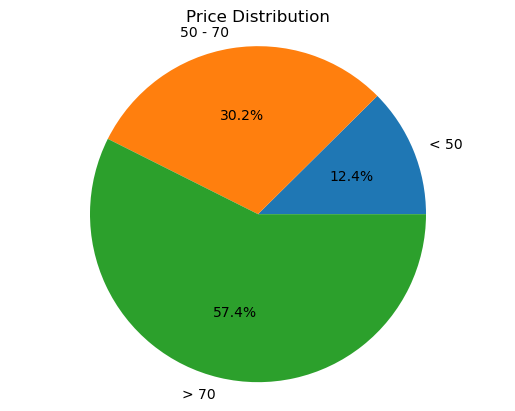

In [42]:
# 创建Edge WebDriver对象（确保已经正确设置了环境变量）
driver = webdriver.Edge()

# 最大化窗口
driver.maximize_window()
for url in url_ls:
    csv_name = kind_ls[url_ls.index(url)]
    e = open("{}.csv".format(csv_name), 'a+', encoding='utf-8-sig', newline='')
    csv_writer = csv.writer(e)
    csv_writer.writerow(['图书名称', '作者', '价格'])
    e.close()

    driver.get(url)
    page_num = 1
    while page_num < 5:
        time.sleep(2)
        ele_ls = driver.find_elements(By.XPATH, '//ul[@id="books_ls"]/li')
        for ele in ele_ls:
            text_1 = ele.find_element(By.XPATH, './/span').text
            text_2 = ele.find_elements(By.XPATH, './/p')[0].text
            text_3 = ele.find_elements(By.XPATH, './/p')[1].text
            line_data = [text_1, text_2, text_3]
            print(line_data)
            
            e = open("{}.csv".format(csv_name), 'a+', encoding='utf-8-sig', newline='')
            csv_writer = csv.writer(e)
            csv_writer.writerow([text_1, text_2, text_3])
            e.close()

        page_num += 1
        time.sleep(1)
        driver.find_elements(By.XPATH, '//div[@id="Pagination1"]/a[@class="disabled"]')[-1].click()

    #读取csv，提取价格这一列数据
    pd_data = pd.read_csv("{}.csv".format(csv_name))
    # 清理数据：删除非数字字符，将字符串转换为数字类型
    use_data = pd_data['价格'].str.replace('定价：', '').str.replace(' 元', '')
    use_data = pd.to_numeric(use_data, errors='coerce') # 将非数值的数据转换为NaN
    use_data = use_data.dropna() # 删除包含NaN值的行

    # 统计价格分布
    less_than_50 = use_data[use_data < 50].count()
    between_50_70 = use_data[(use_data >= 50) & (use_data <= 70)].count()
    greater_than_70 = use_data[use_data > 70].count()

    # 绘制饼状图
    labels = ['< 50', '50 - 70', '> 70']
    sizes = [less_than_50, between_50_70, greater_than_70]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')  # 让饼状图保持圆形
    plt.title('Price Distribution')
    plt.savefig('{}.png'.format(csv_name))
    #plt.show()